# Sales Analysis 

In [2]:
### import libraries

import pandas as pd 

import os

In [3]:
folder_path = './Sales_Data/'

# Read CSV files into DataFrames with the specified folder path
df_apr = pd.read_csv(folder_path + 'Sales_April_2019.csv')
df_aug = pd.read_csv(folder_path + 'Sales_August_2019.csv')
df_dec = pd.read_csv(folder_path + 'Sales_December_2019.csv')
df_feb = pd.read_csv(folder_path + 'Sales_February_2019.csv')
df_jan = pd.read_csv(folder_path + 'Sales_January_2019.csv')
df_july = pd.read_csv(folder_path + 'Sales_July_2019.csv')
df_june = pd.read_csv(folder_path + 'Sales_June_2019.csv')
df_mar = pd.read_csv(folder_path + 'Sales_March_2019.csv')
df_may = pd.read_csv(folder_path + 'Sales_May_2019.csv')
df_nov = pd.read_csv(folder_path + 'Sales_November_2019.csv')
df_oct = pd.read_csv(folder_path + 'Sales_October_2019.csv')
df_sep = pd.read_csv(folder_path + 'Sales_September_2019.csv')

### merge the 12 months on data in a single csv file

folder_path = './Sales_Data/'
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(os.path.join(folder_path, file))
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv',index=False)

In [4]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### clean data

In [5]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### formating

In [6]:
all_data=all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with aditional columns

### Task 2: Add month cloumn

In [9]:
all_data['months']=all_data['Order Date'].str[0:2]
all_data['months']=all_data['months'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
### cleaning the data 

In [11]:
all_data['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

In [12]:
# formmating

all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [13]:
### question  : what was thw best month for sales  ? how much was earned that month

In [14]:
### add a sales column

In [15]:
all_data['Sales']=all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### question : what was thw best month for sales ? how much was earned that month

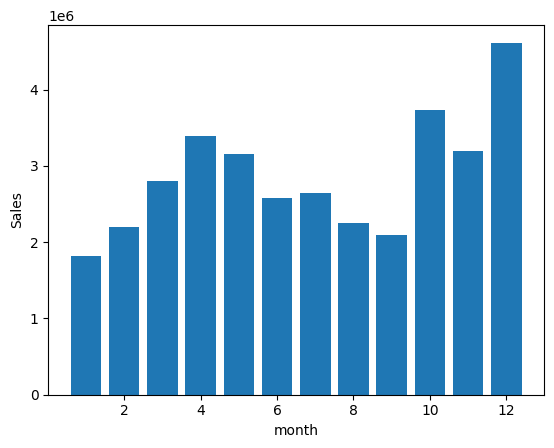

In [17]:
results=all_data.groupby('months').sum('sales')
results.head()


import matplotlib.pyplot as plt

months= range(1,13)
plt.bar(months,results['Sales'])
plt.xlabel("month")
plt.ylabel("Sales")
plt.show()

###  which city has the higher number of sales

### augmenting purchase address columns to extract city name

In [ ]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+","+get_state(x))

all_data.head()

city_sales=all_data.groupby('City')['Sales'].sum()
city_sales.head()


 # ploting : which city has the higest sales
# Create a bar chart to visualize sales for each city
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Plot the data
plt.bar(city_sales.index, city_sales.values)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### what  time should we display advertisment to miximize likelihood of customers buying product?

In [ ]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.head()

# add hour column
all_data['Hours']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

The hour(s) with the highest sales: 19


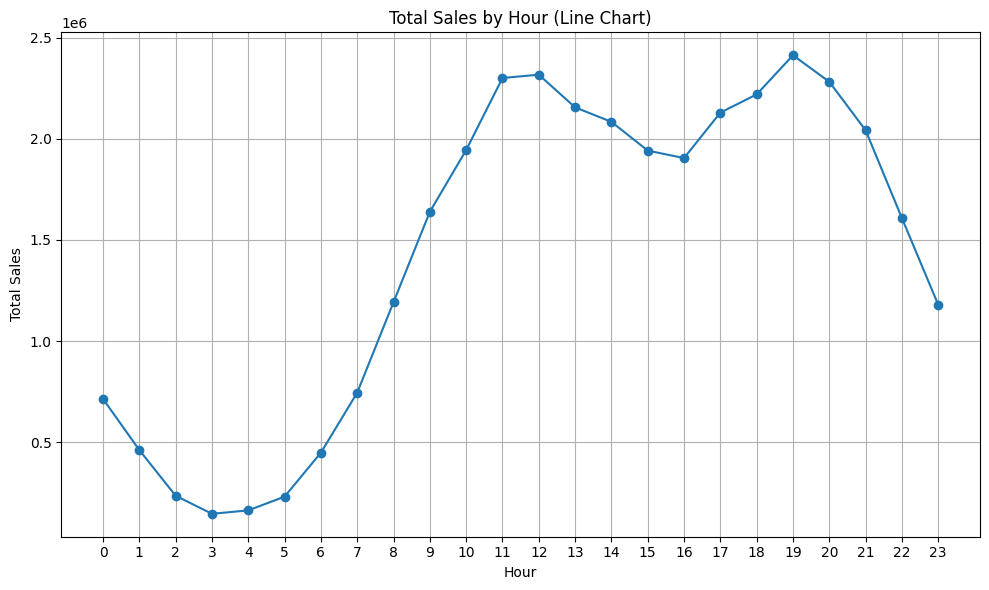

In [20]:
# Group the data by the extracted hour and calculate total sales for each hour
hourly_sales = all_data.groupby('Hours')['Sales'].sum()

# Find the hour(s) with the highest sales
highest_sales_hours = hourly_sales[hourly_sales == hourly_sales.max()].index

# Print the result
print(f"The hour(s) with the highest sales: {', '.join(map(str, highest_sales_hours))}")



# Create a line chart to visualize sales by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour (Line Chart)')
plt.xticks(range(24))
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()
plt.show()

### what product are most often sold together?

In [31]:


# we have same order id for product that are bought ofter together , so we can find out by using this method


df=all_data[all_data['Order ID'].duplicated(keep=False)]


df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\deepa\AppData\Local\Temp\ipykernel_3600\15007006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [38]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### what product sold the most and why

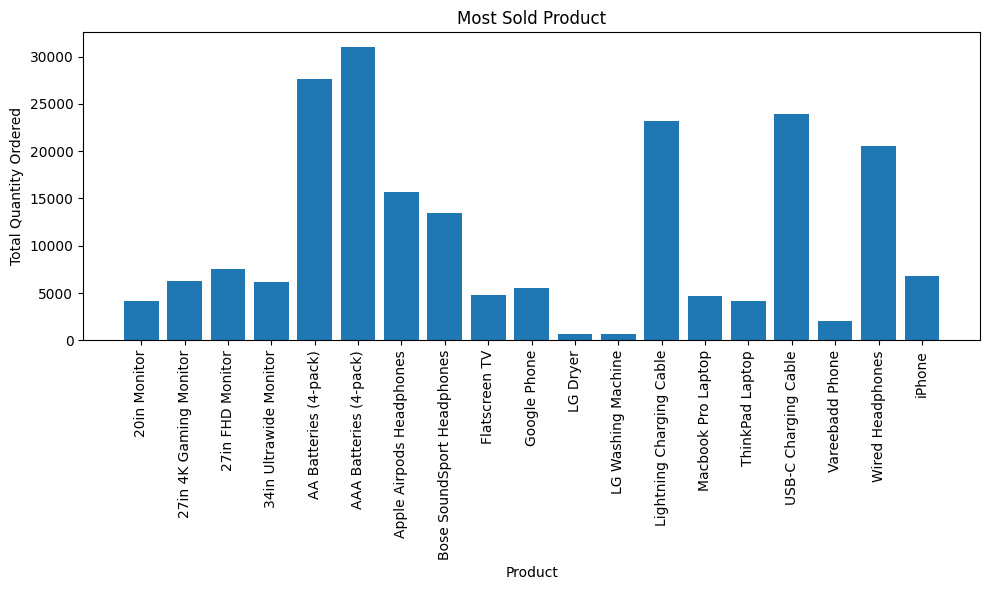

In [48]:
product_sales=all_data.groupby('Product')['Quantity Ordered'].sum()



# Plot a bar chart for the most sold product
plt.figure(figsize=(10, 6))
plt.bar(product_sales.index,product_sales.values)
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Most Sold Product')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()